In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.grid'] = False

In [2]:
from sklearn.datasets import load_digits

In [6]:
data = load_digits()

In [7]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA().fit(data.data)

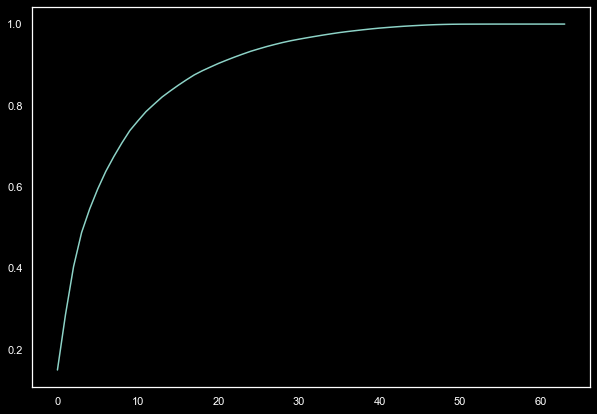

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### So based on this graph we can determine...
The optimal value to keep the variance high and select the number of components.

In [73]:
def plot_digits(data, rows=5, cols= 5):
    fig, axes = plt.subplots(rows, cols, subplot_kw= {'xticks': [], 'yticks': []}, figsize= (5,5))
    
    for ith, ax in enumerate(axes.ravel()):
        ax.imshow(data[ith].reshape(8,8), cmap= 'gray')
        ax.axis('off')

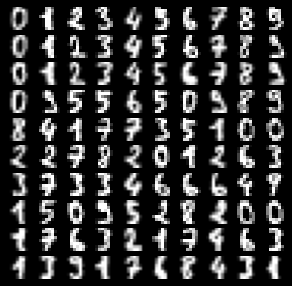

In [74]:
plot_digits(data.data, 10, 10)

# New! 

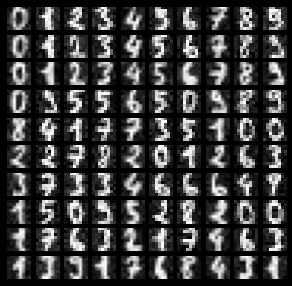

In [82]:
noise = np.random.normal(data.data)
plot_digits(noise, 10, 10)

When we have the noisy data, we can use the PCA to remove noise...

In [98]:
pca = PCA(0.5).fit(noise)

## Wait, what? *how `n_components` can be `float`* ?
As the documentaion says:
    
    If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select the
    number of components such that the amount of variance that needs to be
    explained is greater than the percentage specified by n_components.
    
So when, you privide the float value, `IT WILL TAKE` it as the `VARIANCE` you want to keep. So it will decide automatically how many n_components should be there.

In [99]:
pca.n_components_

5

So, here in this case, it decided to keep 5 dimensions.

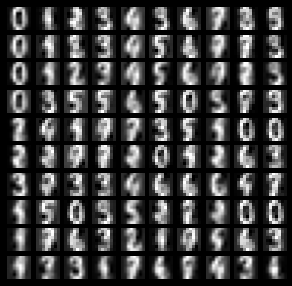

In [104]:
five_D_digits = pca.transform(noise)
five_D_digits = pca.inverse_transform(five_D_digits)

plot_digits(five_D_digits, 10, 10)

# Nice! 

It has removed the noise at the greater extent...

In [112]:
from sklearn.datasets import load_sample_images

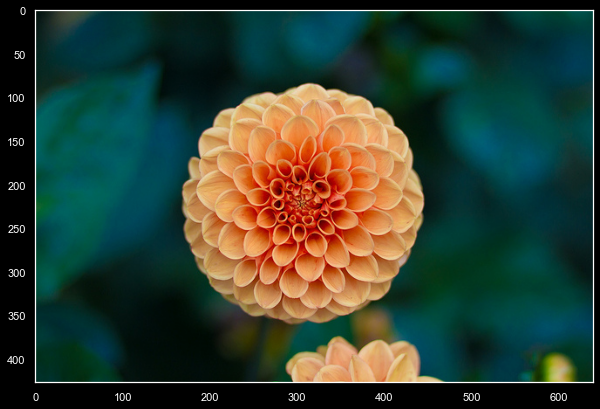

In [120]:
plt.imshow(load_sample_images()['images'][1])

In [121]:
image = load_sample_images()['images'][1]

In [141]:
new = []

for row in image:
    r = []
    for col in row:
        r.append(col.mean())
    new.append(r)

In [146]:
image = np.array(new)

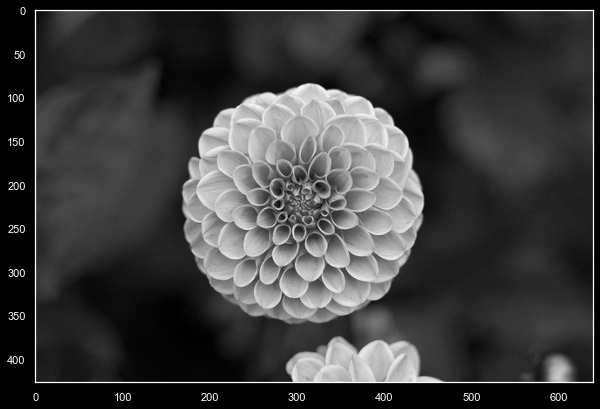

In [147]:
plt.imshow(image, cmap= 'gray')

In [148]:
pca = PCA().fit(image)

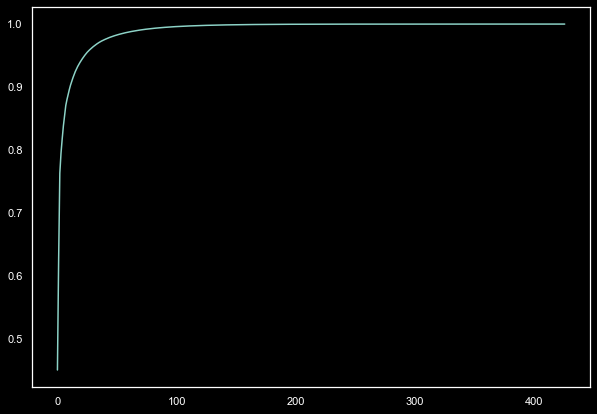

In [149]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

If we even take `10` components, we get great variance... (maybe for 2 comp as well)

In [150]:
pca = PCA(2).fit(image)

In [154]:
temp = pca.transform(image)

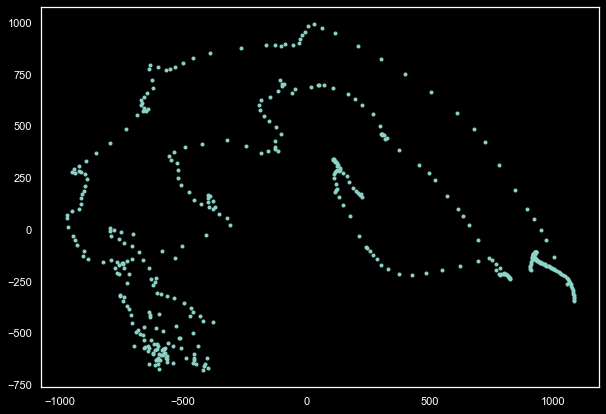

In [156]:
plt.scatter(temp[:,0], temp[:,1], marker= '.')

# Sorry, I should not divert... let's continue... 

In [193]:
#Adding noise
noise = np.random.normal(image, 40)

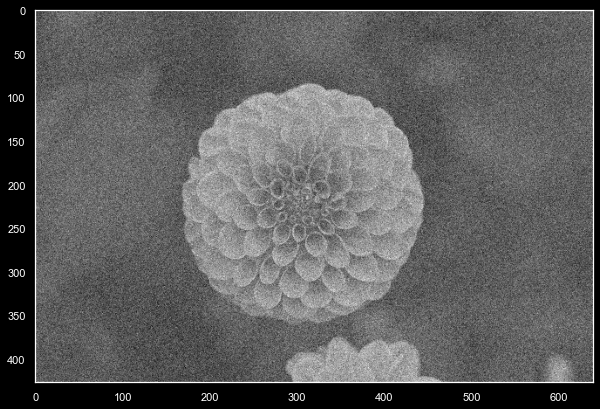

In [194]:
plt.imshow(noise, cmap= "gray")

In [199]:
pca = PCA(0.5).fit(noise)

In [200]:
pca.n_components_

18

In [201]:
img = pca.transform(noise)
img = pca.inverse_transform(img)

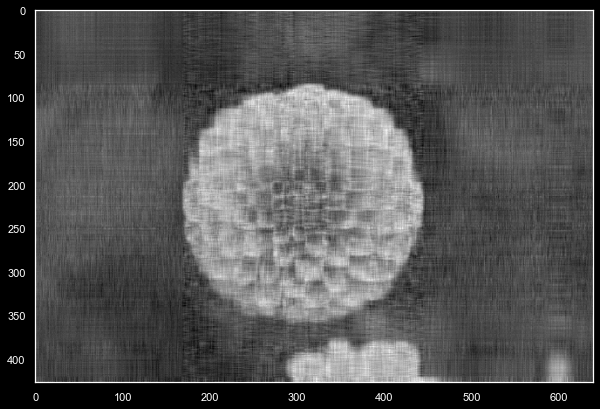

In [202]:
plt.imshow(img, cmap= 'gray')

Bit clear?

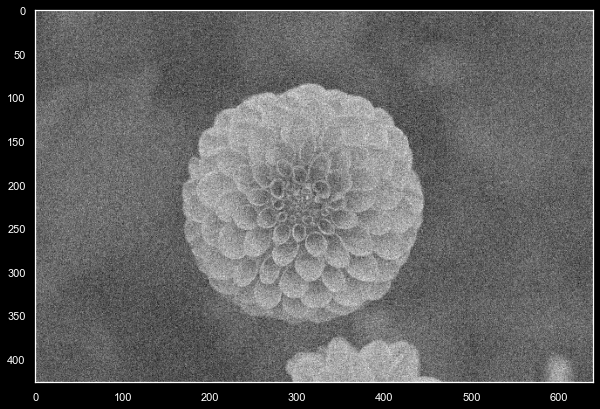

In [203]:
pca = PCA(0.9).fit(noise)
img = pca.transform(noise)
img = pca.inverse_transform(img)
plt.imshow(img, cmap= 'gray')

# 

# 

# The real reason, why I strted this... is not for the noise... It is because...

In the book - they have used the `n_components_` to project the image...

So, till now we have...

- IMAGE.


Let's build on top of this...

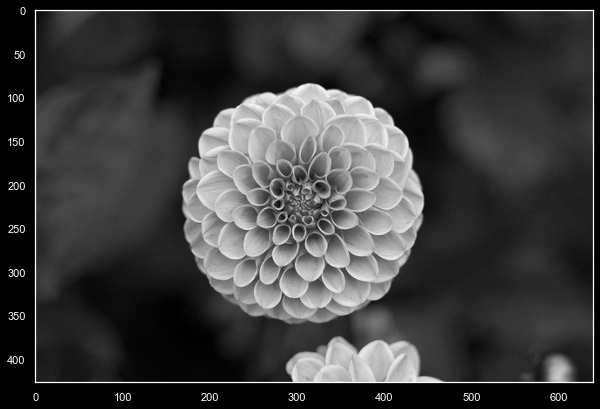

In [204]:
plt.imshow(image, cmap= 'gray')

In [219]:
pca = PCA(150).fit(image)

In [220]:
pca.components_.shape

(150, 640)

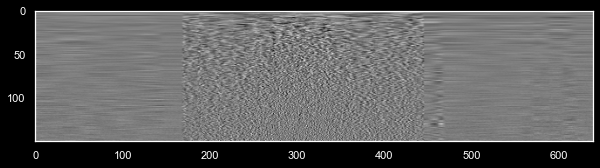

In [222]:
plt.imshow(pca.components_, cmap = 'gray')

###  Actully, not understood... but if it can work with the faces, it should work with Digits.

In [249]:
pca = PCA(10).fit(data.data)

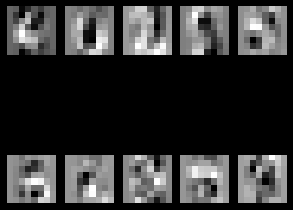

In [250]:
plot_digits(pca.components_, 2, 5)

###  Enough!